In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = '/content/drive/MyDrive/praktikum/praktikum7/data/apples_and_oranges.csv'

In [10]:
df = pd.read_csv(path)
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [11]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [13]:
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [14]:
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [15]:
df['Class'].value_counts()

,count
Class,
orange,20
apple,20


In [16]:
X = df[['Weight','Size']]

y = df['Class']

In [17]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [18]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 32
Jumlah data uji: 8


In [41]:
model = SVC(kernel='linear') # linear karna cuman ada 2 data

model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = model.predict(X_test)

print(f"Akurasi:  {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi:  100.00%

Laporan klasifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confussion Matrix:
 [[3 0]
 [0 5]]


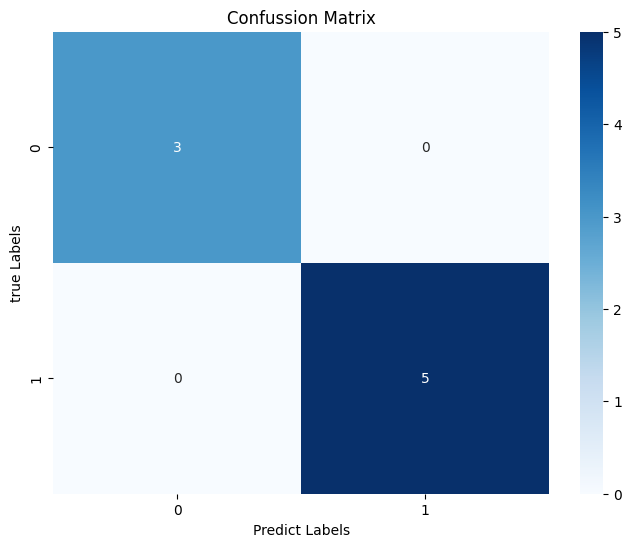

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('Predict Labels')
plt.ylabel('true Labels')
plt.show()

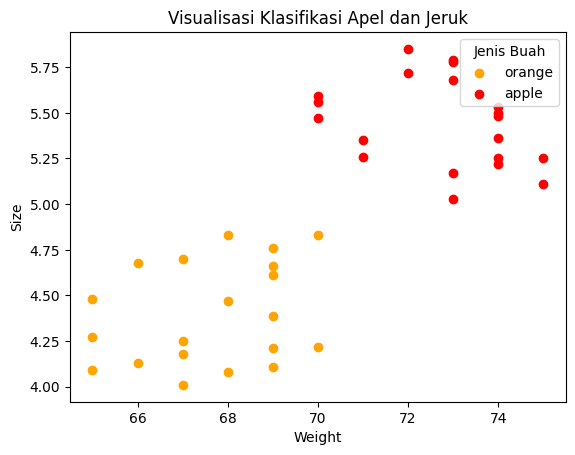

In [40]:
import matplotlib.pyplot as plt

# ambil daftar label unik dari kolom Class
labels = df['Class'].unique()
colors = ['orange', 'red']

# bikin scatter plot per kelas biar legend muncul
for i, label in enumerate(labels):
    subset = df[df['Class'] == label]
    plt.scatter(
        subset['Weight'],
        subset['Size'],
        color=colors[i % len(colors)],
        label=label
    )

plt.title('Visualisasi Klasifikasi Apel dan Jeruk')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend(title='Jenis Buah')  # legend biar keliatan
plt.show()


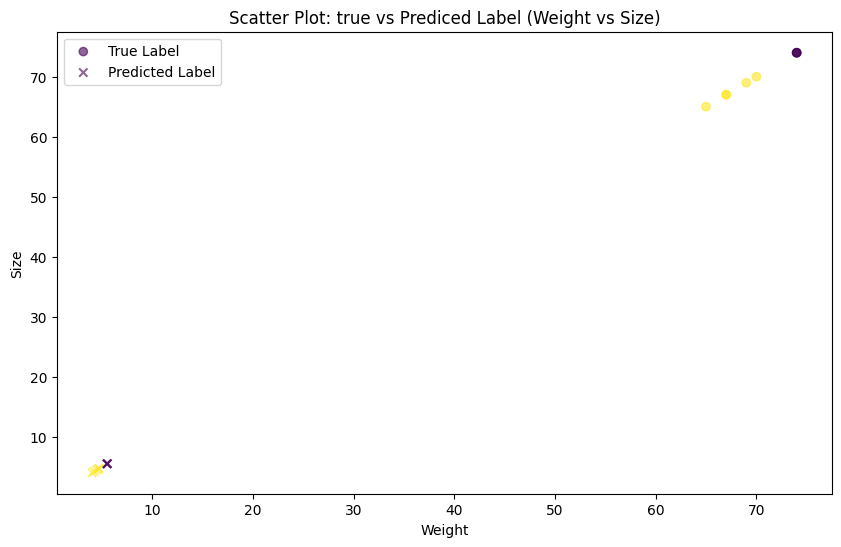

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(10, 6))

plt.scatter(X_test['Weight'], X_test['Weight'], c=y_test_encoded, cmap='viridis', marker='o', label='True Label', alpha=0.6)

plt.scatter(X_test['Size'], X_test['Size'], c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Label', alpha=0.6)

plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Scatter Plot: true vs Prediced Label (Weight vs Size)')
plt.legend()
plt.show()

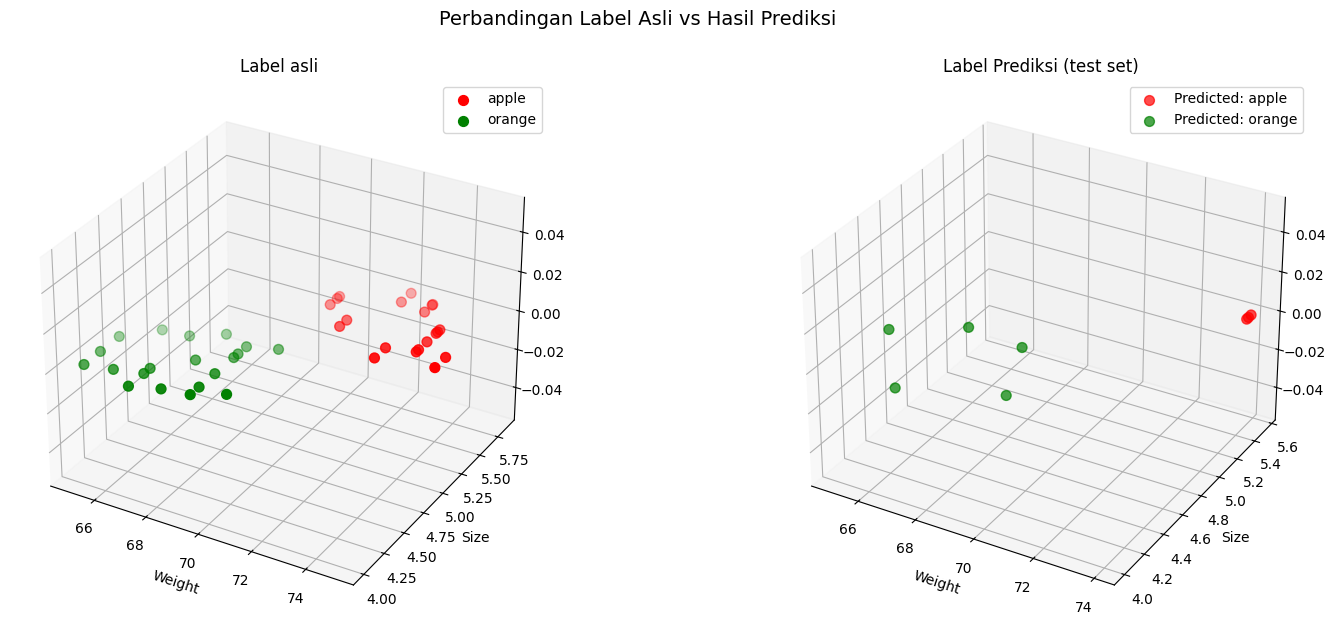

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3. Encocde label (ubah teks jadi angka) - Moved from another cell
le = LabelEncoder()
df['ClassEncoded'] =  le.fit_transform(df['Class'])

# warna untuk tiap kelas
color = ['r', 'g', 'b']
labels = le.classes_

fig = plt.figure(figsize=(18,7))

# plot 1 : label asli
axl = fig.add_subplot(121, projection='3d')
for i, species in enumerate(labels):
  subset = df[df['ClassEncoded'] == i]
  axl.scatter(
      subset['Weight'],
      subset['Size'],
      color=color[i],
      label=species,
      s=50
  )
axl.set_title('Label asli')
axl.set_xlabel('Weight')
axl.set_ylabel('Size')
axl.legend()

# plot 2 label prediksi
ax2 = fig.add_subplot(122, projection='3d')
# tambahkan hasil prediksi ke dataframe
# create a new column and initialize with none
df['Predicted'] = None
# assign predicted values to the rows that were in the test set
df.loc[X_test.index, 'Predicted'] = y_pred

# visualisasi 3d berdasarkan hasil prediksi
# warna untuk tiap kelas hasil preediksi
# Make sure to usee the encoded predicted labels for coloring
if df['Predicted'].dtype == 'object':
  predicted_encoded = le.transform(df.loc[X_test.index, 'Predicted'])
  df.loc[X_test.index, 'PredictedEncoded'] = predicted_encoded
  plot_column = 'PredictedEncoded'
else:
  plot_column = 'Predicted'

for i, species_label in enumerate(labels):
  subset = df.loc[X_test.index].dropna(subset=[plot_column])
  subset = subset[subset[plot_column] == i]

  ax2.scatter(
      subset['Weight'],
      subset['Size'],
      color=color[i],
      label=f"Predicted: {species_label}",
      s=50,
      alpha=0.7
  )

  ax2.set_title('Label Prediksi (test set)')
  ax2.set_xlabel('Weight')
  ax2.set_ylabel('Size')
  ax2.legend()

plt.suptitle('Perbandingan Label Asli vs Hasil Prediksi', fontsize=14)
plt.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

# encode label teks jadi angka biar bisa dikasih warna
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])
y_pred_encoded = le.transform(y_pred)

# reset index biar bisa dipakai untuk sumbu Z
df = df.reset_index()
X_test = X_test.reset_index()

# bikin figure 3D dengan dua kolom
fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=('Label Asli', 'Label Prediksi')
)

# plot 1: label asli
fig.add_trace(
    go.Scatter3d(
        x=df['Weight'],
        y=df['Size'],
        z=df['index'],  # z pake index aja
        mode='markers',
        marker=dict(
            size=5,
            color=df['ClassEncoded'],  # udah numeric
            colorscale='Viridis',
            opacity=0.8
        ),
        name='Asli'
    ),
    row=1, col=1
)

# plot 2: label prediksi
fig.add_trace(
    go.Scatter3d(
        x=X_test['Weight'],
        y=X_test['Size'],
        z=X_test['index'],  # z sama
        mode='markers',
        marker=dict(
            size=5,
            color=y_pred_encoded,  # juga numeric
            colorscale='Viridis',
            opacity=0.8
        ),
        name='Prediksi'
    ),
    row=1, col=2
)

# atur layout
fig.update_layout(
    title='Perbandingan Label Asli vs Prediksi (SVM)',
    showlegend=False,
    height=600,
    width=1200
)

fig.show()
